In [1]:
from torch import nn
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms

In [2]:
# Custom DataSet Class
import numpy as np
from PIL import Image 
import pandas as pd
from torchvision import transforms
import torch

test = 'test'
testing_second_commit = 'test2'
testing_more = 'test3'

class CustomDataSet(Dataset):
    def __init__(self, folder_path, csv_path, transforms = None):
        #get all the necessary parameters for directories, labels and transforms
        self.csv = pd.read_csv(csv_path)
        self.folder_path = folder_path
        self.transforms = transforms

    def __len__(self):
        #get the length of the dataset
        class_length = len(self.csv.iloc[:, 1])
        return class_length

    def __getitem__(self, idx):
        #get the dataset item and label and set transforms
        self.image_path_list = [os.path.join(self.folder_path, image_name) for image_name in self.csv.iloc[:, 0]]
        self.one_hot_label = pd.get_dummies(self.csv.iloc[:, 1])
        self.one_hot_label_list = self.one_hot_label.values.tolist()

        self.image_path = self.image_path_list[idx]
        self.image = Image.open(self.image_path)
        self.label = torch.tensor(self.one_hot_label_list[idx]).float()

        if self.transforms:
            self.image = self.transforms(self.image)

        sample = {'image': self.image, 'label': self.label}     

        return sample

In [3]:
# Parameters
import torch

image_size = (244, 244)
batch_size = 32
epochs = 35

train_folder_path = r'C://Users//rolan//Desktop//Wooden_things//train'
train_csv_path = r'C://Users//rolan//Desktop//Wooden_things//train_csv.csv'

test_folder_path = r'C://Users//rolan//Desktop//Wooden_things//test'
test_csv_path = r'C://Users//rolan//Desktop//Wooden_things//test_csv.csv'

device = 'cuda' if torch.cuda.is_available() else 'cpu'

save_model_path = r'C://Users//rolan//Desktop//personal//Projects//Helpers//Trash//Wooden_things_model_checkpoints'
save_plot_path = r'C://Users//rolan//Desktop//personal//Projects//Helpers//Trash//Wooden_things_plots'

In [4]:
# DataSet

image_transforms = transforms.Compose([transforms.Resize(size = image_size), transforms.ToTensor(), transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

train_data = CustomDataSet(folder_path = train_folder_path, csv_path = train_csv_path, transforms = image_transforms)
test_data = CustomDataSet(folder_path = test_folder_path, csv_path = test_csv_path, transforms = image_transforms)

In [5]:
# DataLoaders
train_loader = DataLoader(dataset = train_data, batch_size = 32, shuffle = True)
test_loader = DataLoader(dataset = test_data, batch_size = 32, shuffle = True)

In [ ]:
# Visualise batch data

import matplotlib.pyplot as plt
import random
import numpy as np
import torch
import math
import os

def plot_batch_samples(data_loader, batch_size):

    log = math.log(batch_size, 2)
    rows = 2**math.ceil(log/2)
    columns = 2**math.ceil(log/2)

    fig = plt.figure(figsize = (3*columns, 3*rows), dpi = 72)

    for idx, sample in zip(list(range(batch_size)), data_loader):
        axis = fig.add_subplot(rows, columns, idx+1)
        np_image = sample['image'].numpy()
        np_image = np_image.transpose((1, 2, 0))
        axis.axis('off')
        axis.set_title(label = sample['label'])
        axis.imshow(np_image)
    plt.show()

plot_batch_samples(train_data, batch_size = batch_size)

#define as function

In [12]:
# from torchvision import models
# # define the model -> transfer learning

# #Load the model
# weigths = models.ResNet50_Weights.DEFAULT
# model = models.resnet50(weights = weigths)

# #Get model parameter names as a list
# list_of_modules = []
# for key1, value1 in model.named_modules():
#     module_list = key1.split('.')
#     list_of_modules.append(module_list)

# resnet_module_list = []
# for names in list_of_modules:
#     module = '.'.join(names)
#     resnet_module_list.append(module)
# print(resnet_module_list)

# unfreeze_layers = ['layer4',
#                    'fc']

# reset_weights_layers = ['layer4',
#                    'fc']

# #Modify the model
# model.fc = nn.Sequential(
#     nn.Linear(in_features = 2048, out_features = 1024),
#     nn.ReLU(),
#     nn.BatchNorm1d(1024),
#     nn.Dropout(0.2),
#     nn.Linear(1024, 1024),
#     nn.ReLU(),
#     nn.BatchNorm1d(1024),
#     nn.Dropout(0.2),
#     nn.Linear(1024, 256),
#     nn.ReLU(),
#     nn.BatchNorm1d(256),
#     nn.Dropout(0.2),
#     nn.Linear(256, 4),
#     nn.Softmax(dim=1)
# )

# #Freeze weights
# for param in model.parameters():
#     param.requires_grad = False

# #Unfreeze weights
# for name, parameters in model.named_parameters():
#     for layer_name in unfreeze_layers:
#         if layer_name in name:
#             parameters.requires_grad = True
#             # param = eval(f'model.{layer_name}')
#             # param.requires_grad = True

# #Reset weights
# for param_name in reset_weights_layers:
#     param = eval(f'model.{param_name}')
#     if isinstance(param, torch.nn.Conv2d):
#         torch.nn.init.kaiming_normal_(param.weight, mode='fan_out', nonlinearity='relu')
#         if param.bias is not None:
#             torch.nn.init.constant_(param.bias, 0)
#     elif isinstance(param, torch.nn.Linear):
#         torch.nn.init.normal_(param.weight, 0, 0.01)

['', 'conv1', 'bn1', 'relu', 'maxpool', 'layer1', 'layer1.0', 'layer1.0.conv1', 'layer1.0.bn1', 'layer1.0.conv2', 'layer1.0.bn2', 'layer1.0.conv3', 'layer1.0.bn3', 'layer1.0.relu', 'layer1.0.downsample', 'layer1.0.downsample.0', 'layer1.0.downsample.1', 'layer1.1', 'layer1.1.conv1', 'layer1.1.bn1', 'layer1.1.conv2', 'layer1.1.bn2', 'layer1.1.conv3', 'layer1.1.bn3', 'layer1.1.relu', 'layer1.2', 'layer1.2.conv1', 'layer1.2.bn1', 'layer1.2.conv2', 'layer1.2.bn2', 'layer1.2.conv3', 'layer1.2.bn3', 'layer1.2.relu', 'layer2', 'layer2.0', 'layer2.0.conv1', 'layer2.0.bn1', 'layer2.0.conv2', 'layer2.0.bn2', 'layer2.0.conv3', 'layer2.0.bn3', 'layer2.0.relu', 'layer2.0.downsample', 'layer2.0.downsample.0', 'layer2.0.downsample.1', 'layer2.1', 'layer2.1.conv1', 'layer2.1.bn1', 'layer2.1.conv2', 'layer2.1.bn2', 'layer2.1.conv3', 'layer2.1.bn3', 'layer2.1.relu', 'layer2.2', 'layer2.2.conv1', 'layer2.2.bn1', 'layer2.2.conv2', 'layer2.2.bn2', 'layer2.2.conv3', 'layer2.2.bn3', 'layer2.2.relu', 'layer2.

In [34]:
class LinearWood(nn.Module):
  def __init__(self):
    super().__init__()

    self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=2, padding=0, dilation=1) #126
    self.maxpool1 = nn.MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1)#62
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=3, stride=2, padding=0, dilation=1) #30
    self.maxpool2 = nn.MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1)#14
    self.conv3 = nn.Conv2d(in_channels=12, out_channels=36, kernel_size=3, stride=2, padding=0, dilation=1) #6

    self.relu = nn.ReLU()
    self.dropout = nn.Dropout2d(0.2)

    self.linear_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(1296, 512),
        nn.ReLU(),
        nn.Dropout(p=0.2),
        nn.Linear(512, 64),
        nn.ReLU(),
        nn.Dropout(p=0.2),      
        nn.Linear(64, 4),
        nn.Softmax(dim=1)
        )

  def forward(self, x):
    prediction = self.conv1(x)
    prediction = self.relu(prediction)
    prediction = self.dropout(prediction)

    prediction = self.maxpool1(prediction)

    prediction = self.conv2(prediction)
    prediction = self.relu(prediction)
    prediction = self.dropout(prediction)

    prediction = self.maxpool2(prediction)

    prediction = self.conv3(prediction)
    prediction = self.relu(prediction)
    prediction = self.dropout(prediction)

    prediction = self.linear_stack(prediction)

    return prediction

# Move to GPU
wt_model = LinearWood().to(device=device)

In [35]:
#optimizer = torch.optim.Adam(params = wt_model.parameters(), lr=1e-3, weight_decay=0.00005, betas = (0.85, 0.99))
optimizer = torch.optim.SGD(params = wt_model.parameters(), lr=0.2, weight_decay=0.0001)

loss = nn.CrossEntropyLoss()

In [37]:
#Define training

def train(model, loss_function, optimizer, the_data_loader):
    model.train()
    train_loss_list = []

    #Itterate through the dataset
    for idx, (sample_batch) in enumerate(the_data_loader):
        image = sample_batch['image']
        label = sample_batch['label']
        image, label = image.to(device), label.to(device)

        prediction = model.forward(image)

        loss = loss_function(prediction, label)
        train_loss_list.append(loss.item())

        loss.backward()
        #initialise the optimiser
        optimizer.step()
        #reset the gradients
        optimizer.zero_grad()

        if idx % 10 == 0:
            print(f'The loss is:{loss.item()}')
    return train_loss_list

In [38]:
def test(model, loss_function, dataloader, dataset):
    batchsize = len(dataloader)
    dataset_length = len(dataset)
    test_loss, total_correct_guesses = 0, 0

    model.eval()
    with torch.no_grad():
        for sample_batch in dataloader: #sample_batch
            input = sample_batch['image']
            label = sample_batch['label']
            input, label = input.to(device), label.to(device)

            output = model.forward(input)
            test_loss += loss_function(output, label)
            total_correct_guesses += (output.argmax(1) == torch.argmax(label, dim=1)).type(torch.float).sum().item()

    avr_loss = test_loss / batchsize
    avr_loss = '{:f}'.format(avr_loss)
    accuracy = total_correct_guesses / dataset_length

    print(f'Model Accuracy: {accuracy*100}% \n Average Loss {avr_loss}')

    return avr_loss, accuracy*100

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from datetime import datetime

def train_loop(epochs):
    train_loss_list = []
    test_loss_list = []
    accuracy_list= []
    current_time = str(datetime.now()).replace(' ', '').replace('.', '').replace(':', '')

    for idx, i in enumerate(range(epochs)):
        print(f'Epoch{i+1} \n --------------------------------------')

        #train the model
        train_loss = train(model = wt_model, loss_function = loss, optimizer = optimizer, the_data_loader = train_loader)
        test_loss, accuracy = test(model = wt_model, loss_function = loss, dataloader = test_loader, dataset = test_data)

        '''plot the graphs as the model trains'''
        #sort the data for the plots        
        for i in train_loss:
            train_loss_list.append(round(i, 3))
        test_loss_list.append(round(float(test_loss), 3))
        accuracy_list.append(accuracy)

        #close previous plots to free up memory
        plt.close('all')
        
        #create and format the figure
        loss_fig, (ax_train, ax_test, ax_acc) = plt.subplots(nrows=3, ncols=1)
        loss_fig.set_size_inches(5, 5)
        loss_fig.set_dpi(72)
        plt.subplots_adjust(hspace=1, wspace=1)

        #plot the data on the axes
        ax_train.plot(list(range(len(train_loader)*(idx+1))), train_loss_list, color='#1f77b4')
        ax_train.set_title('Training Loss/batch')
        ax_train.set_xlabel('Batches')
        ax_train.set_ylabel('Loss')
        ax_train.grid(True)

        ax_test.plot(list(range(idx+1)), test_loss_list, color='#ff7f0e')
        ax_test.set_title('Test Loss/Epoch')
        ax_test.set_xlabel('Epochs')
        ax_test.set_ylabel('Loss')
        ax_test.grid(True)

        ax_acc.plot(list(range(idx+1)), accuracy_list, color='#2ca02c')
        ax_acc.set_title('Model Accuracy')
        ax_acc.set_xlabel('Epochs')
        ax_acc.set_ylabel('Accuracy')
        ax_acc.grid(True)

        #save the model
        a = 0
        if idx % 10 == 0:
            a += 1
            torch.save(obj = wt_model.state_dict, f=f'{save_model_path}//Experiment_{a}{current_time}.pth')
            print(f'Saved model as Experiment_{a}.pth')
        print('Finished')

        #plt.pause(0.1)
        plt.show()

        loss_fig.savefig(fname=f'{save_plot_path}//model_x_{current_time}.pdf', dpi=300)



Epoch1 
 --------------------------------------
The loss is:1.3841683864593506
The loss is:1.3847267627716064
The loss is:1.3828425407409668
Model Accuracy: 30.416666666666664% 
 Average Loss 1.384948
Saved model as Experiment_1.pth
Finished


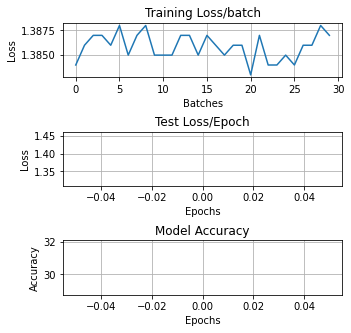

Epoch2 
 --------------------------------------
The loss is:1.3869805335998535
The loss is:1.3831628561019897
The loss is:1.388508677482605
Model Accuracy: 26.666666666666668% 
 Average Loss 1.380627
Finished


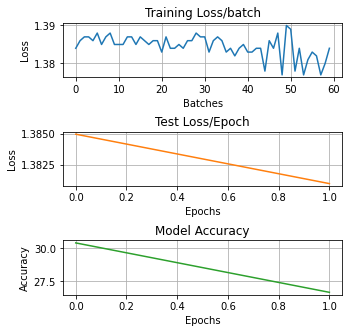

Epoch3 
 --------------------------------------
The loss is:1.3871371746063232
The loss is:1.3805592060089111
The loss is:1.385558009147644
Model Accuracy: 42.916666666666664% 
 Average Loss 1.352267
Finished


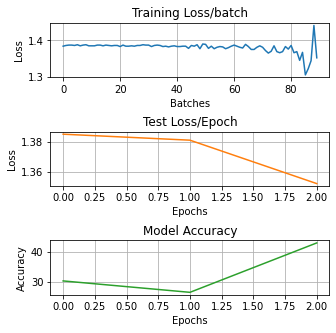

Epoch4 
 --------------------------------------
The loss is:1.3469293117523193
The loss is:1.3153529167175293
The loss is:1.3195908069610596
Model Accuracy: 39.58333333333333% 
 Average Loss 1.327561
Finished


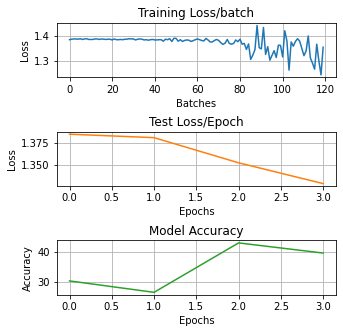

Epoch5 
 --------------------------------------
The loss is:1.3934214115142822
The loss is:1.3518335819244385
The loss is:1.2929673194885254
Model Accuracy: 50.416666666666664% 
 Average Loss 1.277431
Finished


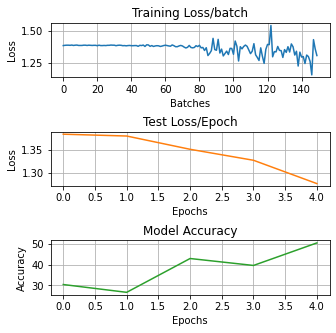

Epoch6 
 --------------------------------------
The loss is:1.2190353870391846
The loss is:1.3305307626724243
The loss is:1.2844104766845703
Model Accuracy: 45.83333333333333% 
 Average Loss 1.264436
Finished


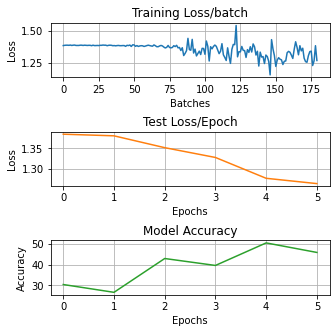

Epoch7 
 --------------------------------------
The loss is:1.4437365531921387
The loss is:1.3594015836715698
The loss is:1.285170316696167
Model Accuracy: 31.666666666666664% 
 Average Loss 1.417590
Finished


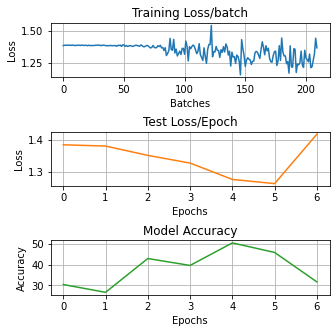

Epoch8 
 --------------------------------------
The loss is:1.3883521556854248
The loss is:1.1021883487701416
The loss is:1.2695467472076416
Model Accuracy: 53.333333333333336% 
 Average Loss 1.228604
Finished


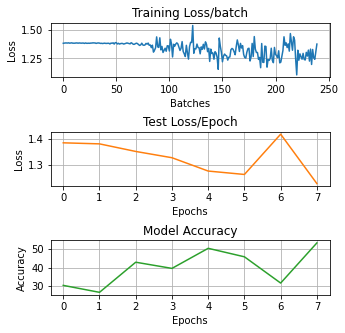

Epoch9 
 --------------------------------------
The loss is:1.277722716331482
The loss is:1.2633016109466553
The loss is:1.2992002964019775
Model Accuracy: 50.416666666666664% 
 Average Loss 1.222412
Finished


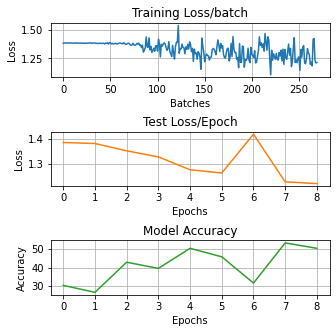

Epoch10 
 --------------------------------------
The loss is:1.1488842964172363
The loss is:1.2295650243759155
The loss is:1.3320183753967285
Model Accuracy: 48.333333333333336% 
 Average Loss 1.251561
Finished


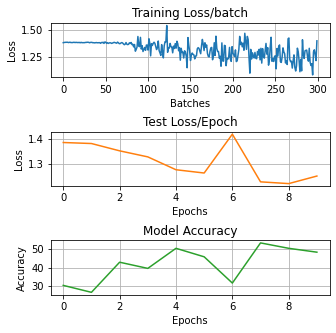

Epoch11 
 --------------------------------------
The loss is:1.3078420162200928
The loss is:1.122477412223816
The loss is:1.2744156122207642
Model Accuracy: 51.66666666666667% 
 Average Loss 1.203499
Saved model as Experiment_1.pth
Finished


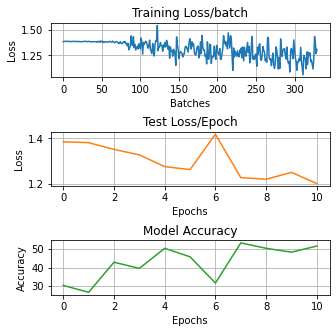

Epoch12 
 --------------------------------------
The loss is:1.2659896612167358
The loss is:1.2310447692871094
The loss is:1.2579013109207153
Model Accuracy: 51.24999999999999% 
 Average Loss 1.225566
Finished


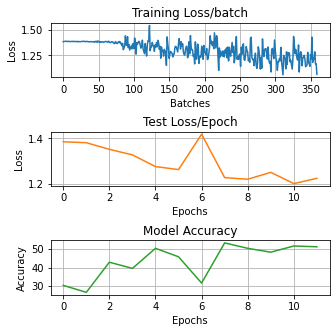

Epoch13 
 --------------------------------------
The loss is:1.112412929534912
The loss is:1.3536608219146729
The loss is:1.1044385433197021
Model Accuracy: 59.166666666666664% 
 Average Loss 1.136092
Finished


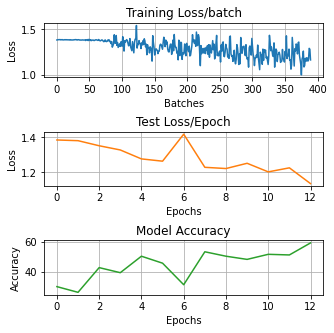

Epoch14 
 --------------------------------------
The loss is:1.1641649007797241
The loss is:1.1546549797058105
The loss is:1.1307427883148193
Model Accuracy: 48.333333333333336% 
 Average Loss 1.236933
Finished


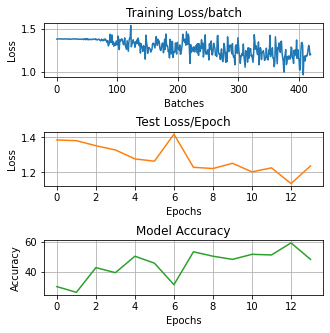

Epoch15 
 --------------------------------------
The loss is:1.2097752094268799
The loss is:1.1210606098175049
The loss is:1.1060006618499756
Model Accuracy: 59.166666666666664% 
 Average Loss 1.149564
Finished


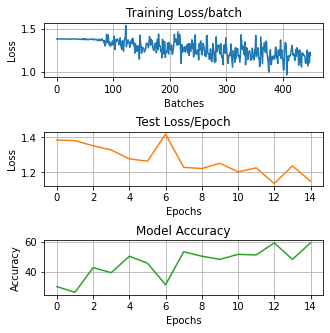

Epoch16 
 --------------------------------------
The loss is:1.0792784690856934
The loss is:1.1969444751739502
The loss is:1.2120379209518433
Model Accuracy: 49.166666666666664% 
 Average Loss 1.256750
Finished


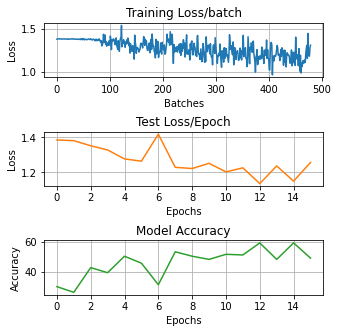

Epoch17 
 --------------------------------------
The loss is:1.3277512788772583
The loss is:1.152087688446045
The loss is:1.1990957260131836
Model Accuracy: 61.25000000000001% 
 Average Loss 1.120746
Finished


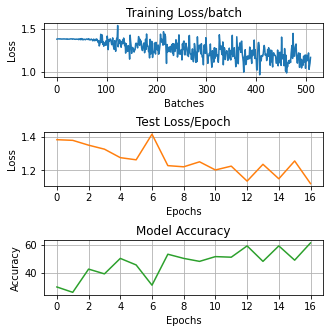

Epoch18 
 --------------------------------------
The loss is:0.9947106242179871
The loss is:1.1290725469589233
The loss is:1.177902102470398
Model Accuracy: 52.083333333333336% 
 Average Loss 1.203546
Finished


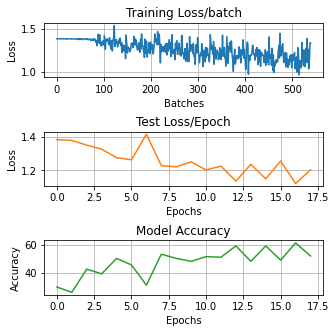

Epoch19 
 --------------------------------------
The loss is:1.1060949563980103
The loss is:1.1005046367645264
The loss is:1.2477480173110962
Model Accuracy: 53.75% 
 Average Loss 1.206919
Finished


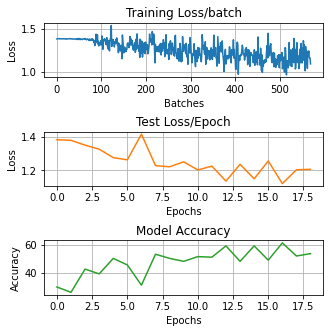

Epoch20 
 --------------------------------------
The loss is:1.0427484512329102
The loss is:1.1855411529541016
The loss is:1.0612945556640625
Model Accuracy: 48.333333333333336% 
 Average Loss 1.261244
Finished


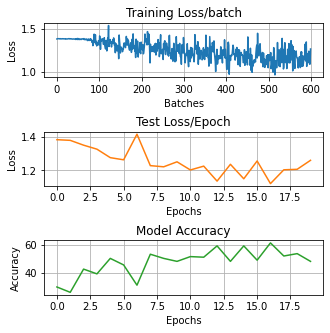

Epoch21 
 --------------------------------------
The loss is:1.278980016708374
The loss is:1.19474458694458
The loss is:1.3392248153686523
Model Accuracy: 55.00000000000001% 
 Average Loss 1.183150
Saved model as Experiment_1.pth
Finished


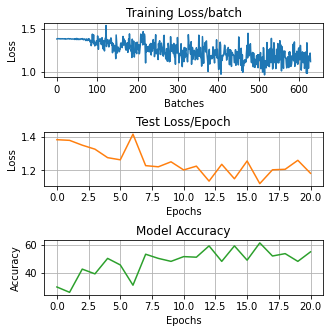

Epoch22 
 --------------------------------------
The loss is:1.3483281135559082
The loss is:1.0574828386306763
The loss is:1.0525352954864502
Model Accuracy: 53.333333333333336% 
 Average Loss 1.208760
Finished


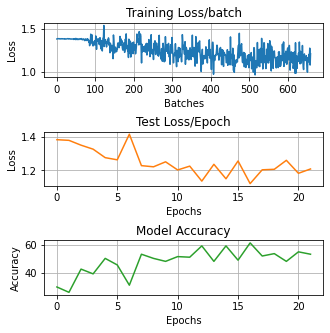

Epoch23 
 --------------------------------------
The loss is:1.2176105976104736
The loss is:1.1928657293319702
The loss is:1.1687449216842651
Model Accuracy: 61.66666666666667% 
 Average Loss 1.135500
Finished


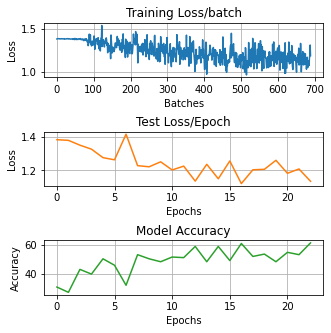

Epoch24 
 --------------------------------------
The loss is:1.0614604949951172
The loss is:1.253819465637207
The loss is:1.4115468263626099
Model Accuracy: 60.416666666666664% 
 Average Loss 1.130888
Finished


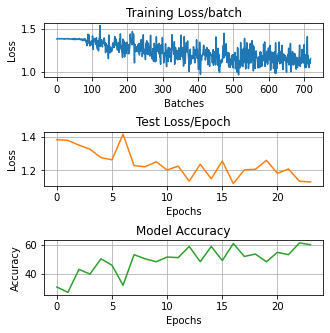

Epoch25 
 --------------------------------------
The loss is:0.9430047273635864
The loss is:1.038923740386963
The loss is:1.0289143323898315
Model Accuracy: 61.25000000000001% 
 Average Loss 1.133570
Finished


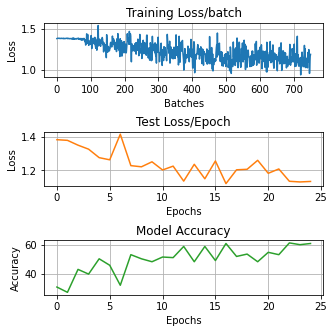

Epoch26 
 --------------------------------------
The loss is:0.9253920912742615
The loss is:1.14638090133667
The loss is:1.1235830783843994
Model Accuracy: 57.08333333333333% 
 Average Loss 1.165141
Finished


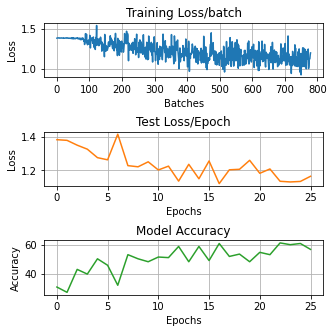

Epoch27 
 --------------------------------------
The loss is:1.0273619890213013
The loss is:1.0109622478485107
The loss is:1.121352195739746
Model Accuracy: 50.0% 
 Average Loss 1.236246
Finished


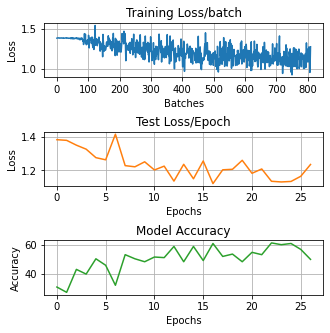

Epoch28 
 --------------------------------------
The loss is:1.159591794013977
The loss is:1.0916929244995117
The loss is:1.1685694456100464
Model Accuracy: 57.08333333333333% 
 Average Loss 1.167683
Finished


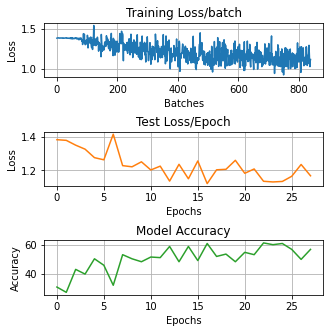

Epoch29 
 --------------------------------------
The loss is:1.0001435279846191
The loss is:1.2363792657852173
The loss is:1.1274781227111816
Model Accuracy: 57.49999999999999% 
 Average Loss 1.171525
Finished


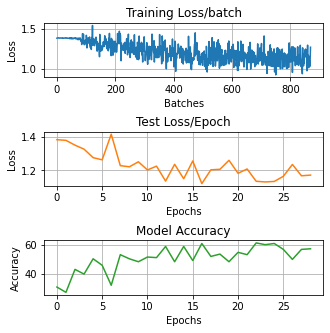

Epoch30 
 --------------------------------------
The loss is:1.1564710140228271
The loss is:1.2802588939666748
The loss is:1.014966607093811
Model Accuracy: 52.5% 
 Average Loss 1.205876
Finished


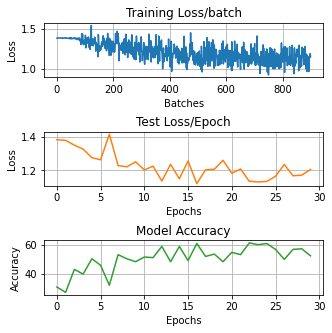

Epoch31 
 --------------------------------------
The loss is:1.0844371318817139
The loss is:1.0463614463806152
The loss is:1.1596256494522095
Model Accuracy: 61.66666666666667% 
 Average Loss 1.137370
Saved model as Experiment_1.pth
Finished


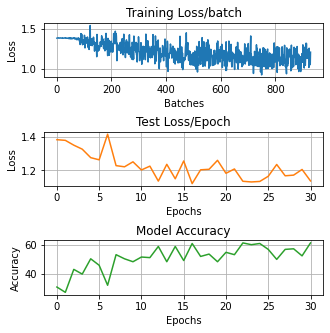

Epoch32 
 --------------------------------------
The loss is:0.9946155548095703
The loss is:1.092268705368042
The loss is:1.0536247491836548
Model Accuracy: 62.916666666666664% 
 Average Loss 1.100761
Finished


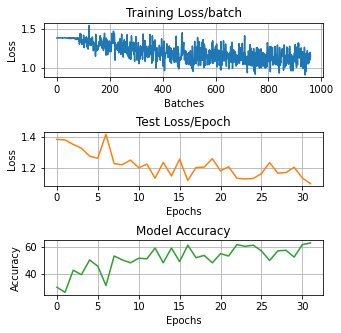

Epoch33 
 --------------------------------------
The loss is:1.0029113292694092
The loss is:1.124626636505127
The loss is:1.1611638069152832
Model Accuracy: 37.916666666666664% 
 Average Loss 1.372994
Finished


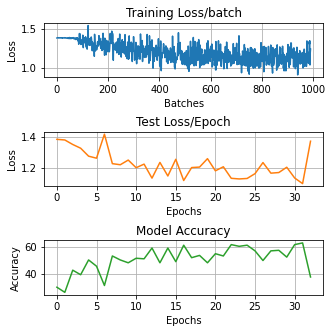

Epoch34 
 --------------------------------------
The loss is:1.3061683177947998
The loss is:1.4414713382720947
The loss is:1.1924711465835571
Model Accuracy: 52.916666666666664% 
 Average Loss 1.217018
Finished


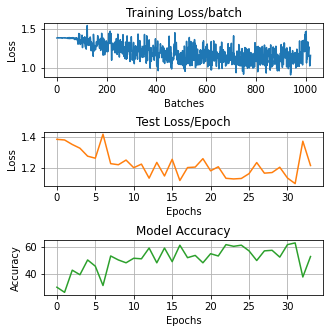

Epoch35 
 --------------------------------------
The loss is:1.2109441757202148
The loss is:1.2550058364868164
The loss is:1.2149814367294312
Model Accuracy: 42.916666666666664% 
 Average Loss 1.317539
Finished


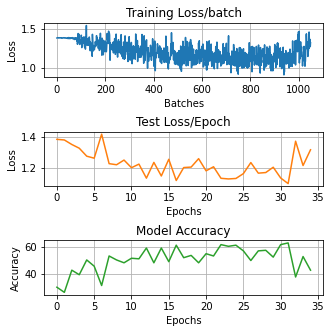

In [40]:
train_loop(epochs = epochs)